In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [23]:
param_grid = {
    'C': [0.1, 1, 2, 10],
    'kernel': ['linear','rbf','poly'],
    'gamma': ['scale','auto']
}

In [24]:
data = load_iris()
X,y = data.data, data.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()

#Standardizing the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#training svm model
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best Cross Validation Accuracy:", grid_search.best_score_)

Best parameters:  {'C': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross Validation Accuracy: 0.9666666666666668


In [27]:
svm_model = SVC(kernel='poly', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

#prediction and evaluation
y_pred = svm_model.predict(X_test)

print("Iris Dataset accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Classification Report: \n", classification_report(y_test,y_pred))

Iris Dataset accuracy: 0.9666666666666667
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



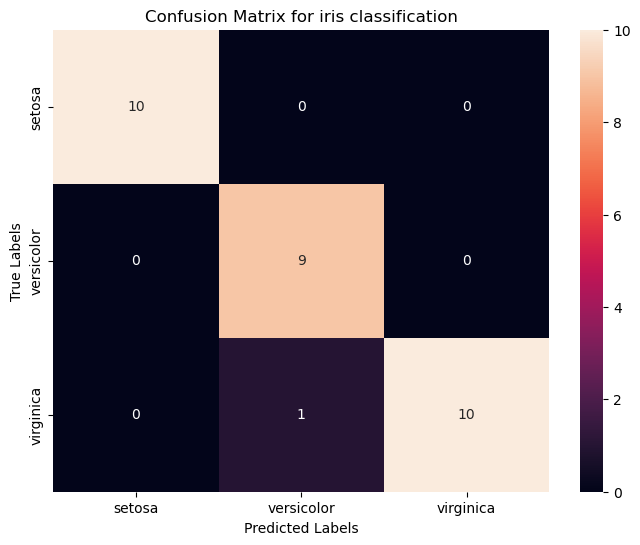

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for iris classification")
plt.show()

In [35]:
iris_classifier_model = (svm_model, scaler)

In [41]:
model_filename = "iris_classifier_model.pkl"

with open(model_filename, 'wb') as f:
    pickle.dump(iris_classifier_model, f)

In [42]:
with open("iris_classifier_model.pkl", 'rb') as f:
    loaded_model = pickle.load(f)

In [46]:
prediction = svm_model.predict(np.array([[4, 5, 6, 7]]))
prediction

array([2])